In [3]:
import pandas as pd
import numpy as np

In [12]:
df1 = pd.read_csv('output.csv')
df1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [5]:
#Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis

import pandas as pd
import numpy as np

df = pd.read_csv('output.csv')
print(df.head())
df['height'] = np.random.randint(150, 181, df.shape[0])
print(df['height'].head())
df.to_csv('output_corrected.csv', index=False)
print("Height column updated and data saved successfully.")


            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  
0    159
1    155
2    168
3    170
4    169
Name: height, dtype: int32
Height column updated and data saved successfully.


In [3]:
import pandas as pd

df = pd.read_csv('output_corrected.csv')
print(df.columns)


Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary', 'height'],
      dtype='object')


In [3]:
#Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

import pandas as pd
df = pd.read_csv('output_corrected.csv')

team_distribution = df['Team'].value_counts()
total_employees = len(df)
percentage_split = (team_distribution / total_employees) * 100

team_distribution_df = pd.DataFrame({
    'Team': team_distribution.index,
    'Number of Employees': team_distribution.values,
    'Percentage (%)': percentage_split.values
})

print(team_distribution_df)

team_distribution_df.to_csv('team_distribution.csv', index=False)

print("Team distribution and percentage split calculated successfully.")


                      Team  Number of Employees  Percentage (%)
0     New Orleans Pelicans                   19        4.148472
1        Memphis Grizzlies                   18        3.930131
2                Utah Jazz                   16        3.493450
3          New York Knicks                   16        3.493450
4          Milwaukee Bucks                   16        3.493450
5            Brooklyn Nets                   15        3.275109
6   Portland Trail Blazers                   15        3.275109
7    Oklahoma City Thunder                   15        3.275109
8           Denver Nuggets                   15        3.275109
9       Washington Wizards                   15        3.275109
10              Miami Heat                   15        3.275109
11       Charlotte Hornets                   15        3.275109
12           Atlanta Hawks                   15        3.275109
13       San Antonio Spurs                   15        3.275109
14         Houston Rockets              

In [5]:
#Segregate employees based on their positions within the company.

import pandas as pd
df = pd.read_csv('output_corrected.csv')
position_distribution = df['Position'].value_counts()

position_distribution_df = pd.DataFrame({
    'Position': position_distribution.index,
    'Number of Employees': position_distribution.values
})

print(position_distribution_df)

position_distribution_df.to_csv('position_distribution.csv', index=False)

print("Position-based segregation of employees calculated successfully.")


  Position  Number of Employees
0       SG                  102
1       PF                  100
2       PG                   92
3       SF                   85
4        C                   79
Position-based segregation of employees calculated successfully.


In [7]:
#Identify the predominant age group among employees.
import pandas as pd
df = pd.read_csv('output_corrected.csv')

bins = [18, 25, 35, 45, 55, 65]  # Age ranges
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group_distribution = df['Age Group'].value_counts()

predominant_age_group = age_group_distribution.idxmax()
predominant_age_count = age_group_distribution.max()

age_group_df = pd.DataFrame({
    'Age Group': age_group_distribution.index,
    'Number of Employees': age_group_distribution.values
})

print(age_group_df)
print(f"\nPredominant Age Group: {predominant_age_group} with {predominant_age_count} employees.")

age_group_df.to_csv('age_group_distribution.csv', index=False)

print("Age group distribution and predominant group calculated successfully.")


  Age Group  Number of Employees
0     25-34                  272
1     18-24                  154
2     35-44                   32
3     45-54                    0
4     55-64                    0

Predominant Age Group: 25-34 with 272 employees.
Age group distribution and predominant group calculated successfully.


In [9]:
#Discover which team and position have the highest salary expenditure. 

import pandas as pd
df = pd.read_csv('output_corrected.csv')

salary_expenditure = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()
highest_salary_expenditure = salary_expenditure.sort_values(by='Salary', ascending=False).head(1)

print("Team and Position with the Highest Salary Expenditure:")
print(highest_salary_expenditure)

highest_salary_expenditure.to_csv('highest_salary_expenditure.csv', index=False)

print("Salary expenditure calculated and saved successfully.")


Team and Position with the Highest Salary Expenditure:
                  Team Position      Salary
67  Los Angeles Lakers       SF  31866445.0
Salary expenditure calculated and saved successfully.


Correlation between Age and Salary: 0.21400941226570985


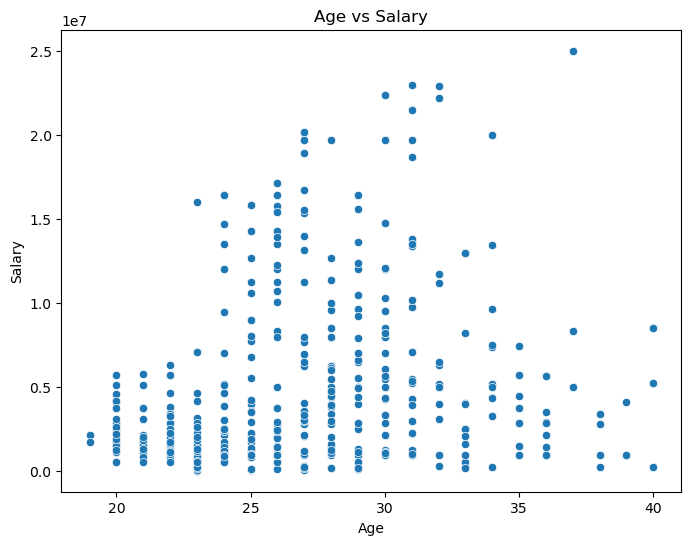

In [11]:
#Investigate if there's any correlation between age and salary, and represent it visually

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('output_corrected.csv')

correlation = df['Age'].corr(df['Salary'])

print(f"Correlation between Age and Salary: {correlation}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


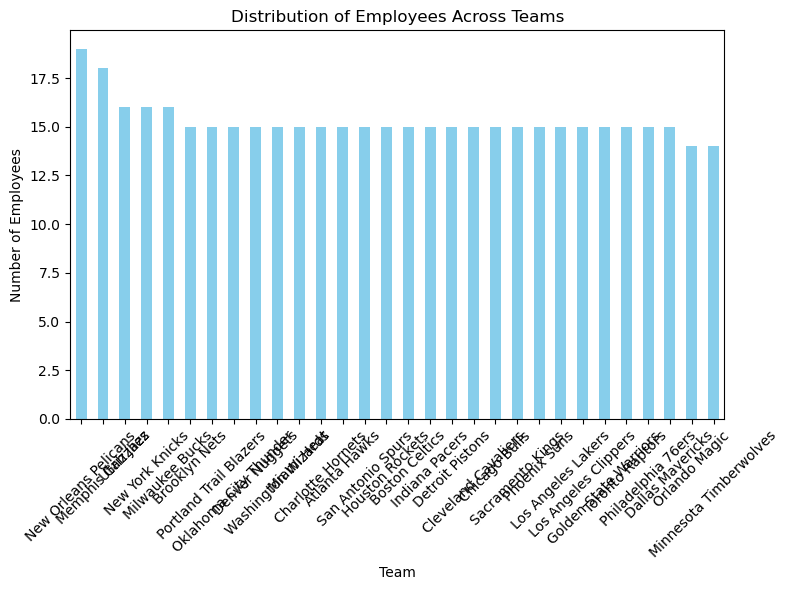

In [1]:
#Graphical Representation:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('output_corrected.csv')
team_distribution = df['Team'].value_counts()
plt.figure(figsize=(8, 6))
team_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

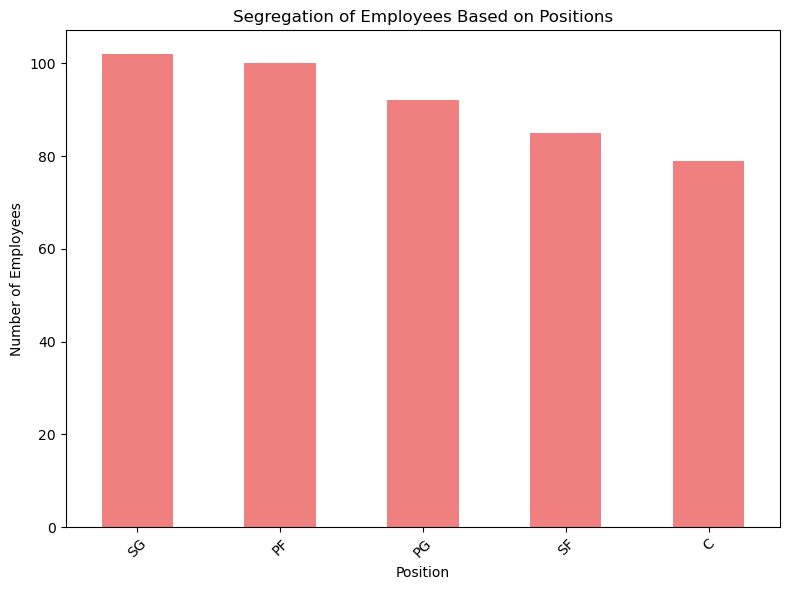

In [3]:
#Graphical Representation:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('output_corrected.csv')
position_distribution = df['Position'].value_counts()
plt.figure(figsize=(8, 6))
position_distribution.plot(kind='bar', color='lightcoral')
plt.title('Segregation of Employees Based on Positions')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


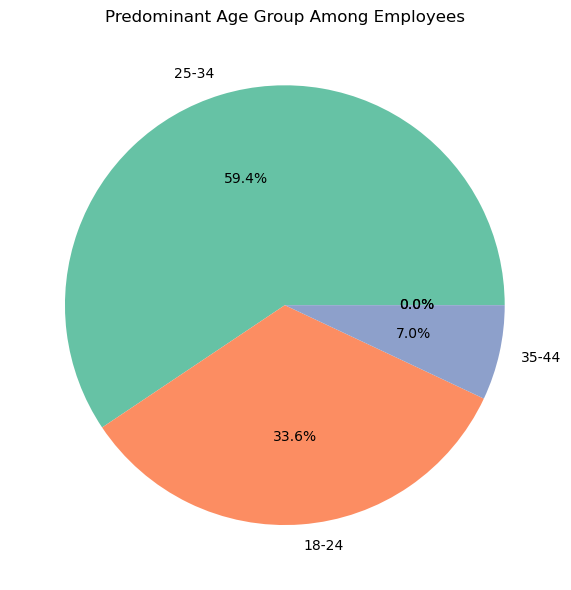

In [5]:
#Graphical Representation:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('output_corrected.csv')
age_bins = [18, 25, 35, 45, 55, 65]  # Age ranges
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_distribution = df['Age Group'].value_counts()
plt.figure(figsize=(8, 6))
age_group_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set2", len(age_group_distribution)))
plt.title('Predominant Age Group Among Employees')
plt.ylabel('')
plt.tight_layout()
plt.show()


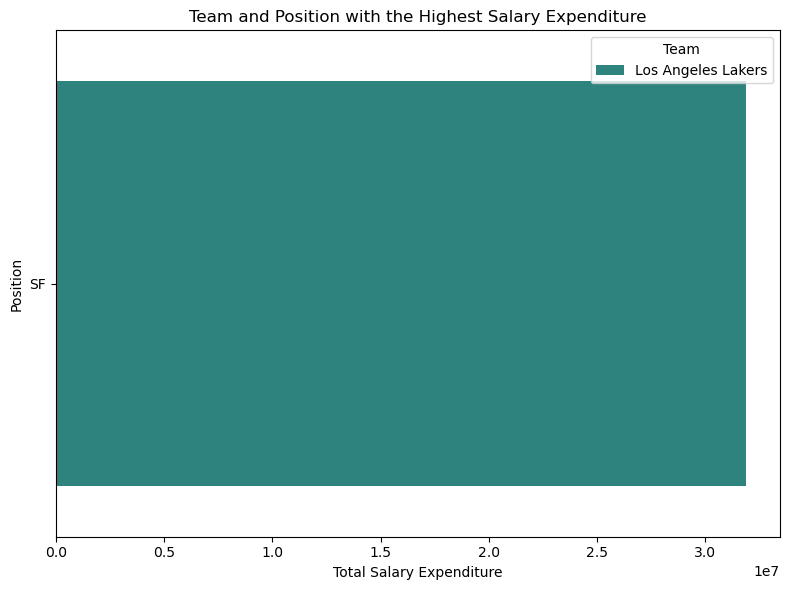

In [7]:
#Graphical Representation:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('output_corrected.csv')
salary_expenditure = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()
highest_salary_expenditure = salary_expenditure.sort_values(by='Salary', ascending=False).head(1)
plt.figure(figsize=(8, 6))
sns.barplot(x='Salary', y='Position', data=highest_salary_expenditure, hue='Team', palette='viridis')
plt.title('Team and Position with the Highest Salary Expenditure')
plt.xlabel('Total Salary Expenditure')
plt.ylabel('Position')
plt.tight_layout()
plt.show()



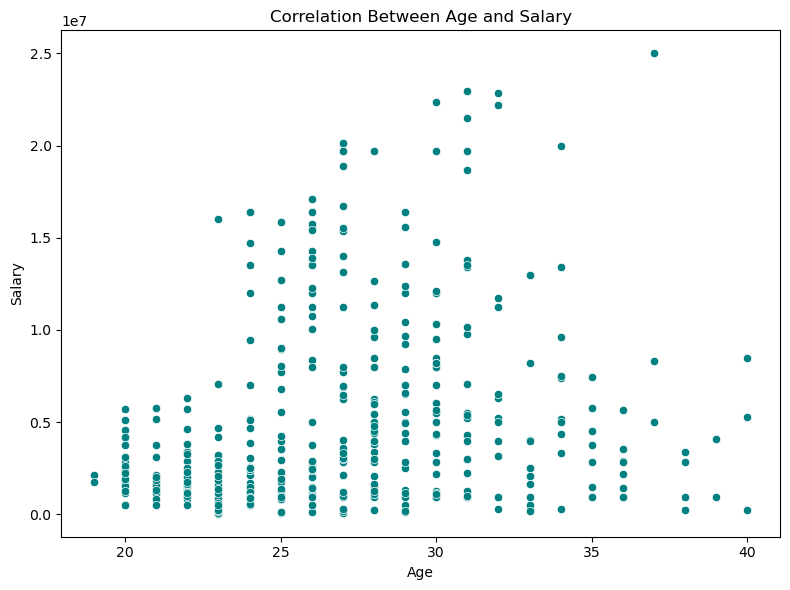

In [9]:
#Graphical Representation:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('output_corrected.csv')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df, color='teal')
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()